# Exploring Gun Deaths in US
In this guided project we have a dataset ("guns.csv") for all the deaths in US, caused by guns, in the years from 2012 to 2014. We will be exploring this data to understand distribution of these gun deaths across different years, months, races, gender and age groups. We will be carrying out our analysis thorugh data visualization by extensively using matplotlib library. 

*We have an another supporting file: "census.csv", to access information about the total population of different races in US.  

In [1]:
# We'll be starting by importing the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
guns = pd.read_csv("guns.csv")
census = pd.read_csv("census.csv")
guns.head(5)

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [3]:
# We will be renaming "Unnamed: 0" column to "count" 
guns.rename({"Unnamed: 0": "count"}, axis = 1, inplace = True)
guns.head(5)

,count,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [4]:
census

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


### Gun Deaths Per Year/Per Month

Text(0.5,1,'RECORDED DEATHS BY GUNS IN USA - PER YEAR')

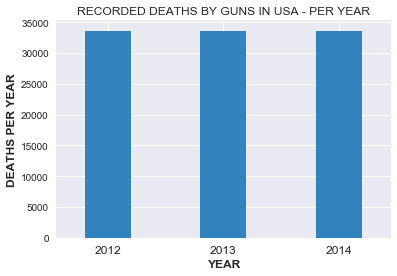

In [5]:
per_year = guns.groupby("year").count()["count"]
ax_year = per_year.plot(kind = "bar", colormap = "tab20c", width = 0.4)
ax_year.set_xlabel("YEAR")
ax_year.set_ylabel("DEATHS PER YEAR", fontweight = "bold", fontsize = "12")
ax_year.set_xlabel("YEAR", fontweight = "bold", fontsize = "12")
ax_year.set_xticklabels([2012, 2013, 2014], rotation = 0, fontsize = "12")
ax_year.set_title("RECORDED DEATHS BY GUNS IN USA - PER YEAR")

* As evident in the bar plot above, the gun deaths have only slightly decreased from 2012 to 2014. 

Text(0.5,1,'NUMBER OF RECORDED DEATHS BY GUNS IN USA-PER MONTH')

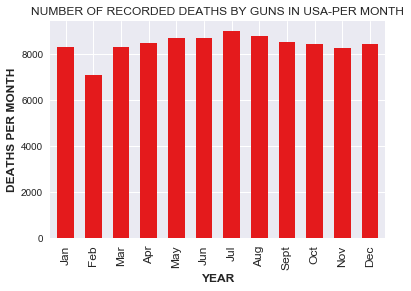

In [6]:
per_month = guns.groupby("month").count()["count"]
ax_month = per_month.plot(kind = "bar", colormap = "Set1", width = 0.60)
ax_month.set_xlabel("MONTH")
ax_month.set_ylabel("DEATHS PER MONTH", fontweight = "bold", fontsize = "12")
ax_month.set_xlabel("YEAR", fontweight = "bold", fontsize = "12")
ax_month.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"], rotation = 90, fontsize = "12")
ax_month.set_title("NUMBER OF RECORDED DEATHS BY GUNS IN USA-PER MONTH")

* The gun deaths have remained fairly constant across the year. The slight difference is only comes from the difference in number of days of a particular month (eg: February month having the least number of recorded gun deaths).  

In [7]:
cause = guns.groupby("intent").count()["count"]
total = cause.sum()
cause = cause.to_frame()
cause["share%"] = round((cause["count"]/total)*100, 0)
cause

,count,share%
intent,,
Accidental,1639,2.0
Homicide,35176,35.0
Suicide,63175,63.0
Undetermined,807,1.0


This dataset contains a column "intent"-  specifying the nature of each death incident (suicide, homicide, accident etc.). Let's continue our analysis by looking at the distribution of these gun deaths across different nature of death incidents

Text(0.5,1,'Percentage Share of Different Death Incidents Involving Guns')

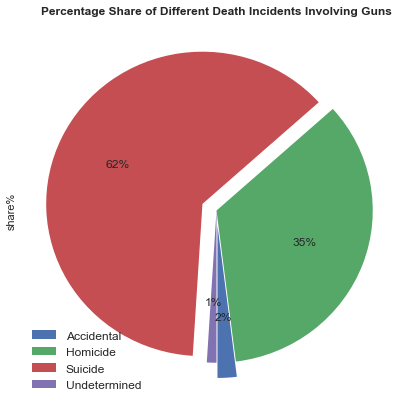

In [95]:
ax_cause = cause.plot.pie(y = "share%",figsize=(7, 7), startangle = 270, explode = (0.1,0,0.1,0), autopct='%1.0f%%', fontsize = 12, labels= ["","","","",""])
ax_cause.legend(loc =3, labels= ["Accidental", "Homicide", "Suicide", "Undetermined"], fontsize =12)
ax_cause.set_title("Percentage Share of Different Death Incidents Involving Guns", fontweight = "bold")

* The piechart above conveys that the gun death incidents are majorly contributed in form of either suicide or homicide cases.  

We will be focusing on suicide incidents first and visualize how these suicide cases are distribued across different races  

Text(0.5,1,'Percentage Share of Suicide Cases Involving Guns Across Different Races')

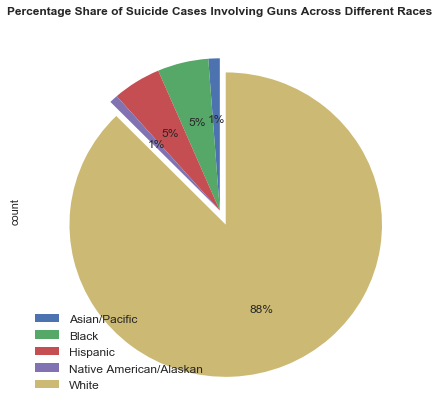

In [92]:
cause_race = guns.groupby(["intent", "race"]).count()["count"]
ax_suicide = cause_race.iloc[10:15].plot.pie(figsize = (7,7), startangle = 90, explode = (0,0,0,0,0.1), autopct='%1.0f%%', fontsize = 12, labels= ["","","","",""])
ax_suicide.legend(loc =3, labels= ["Asian/Pacific", "Black", "Hispanic", "Native American/Alaskan", "White"], fontsize =12)
ax_suicide.set_title("Percentage Share of Suicide Cases Involving Guns Across Different Races", fontweight = "bold")

The piechart above reveals that the suicide cases by guns are overwhelmingly comprise of white people

- Let's look into the homicide cases' distribution among different races:

Text(0.5,1,'Percentage Share of Homicide Cases Involving Guns Across Different Races')

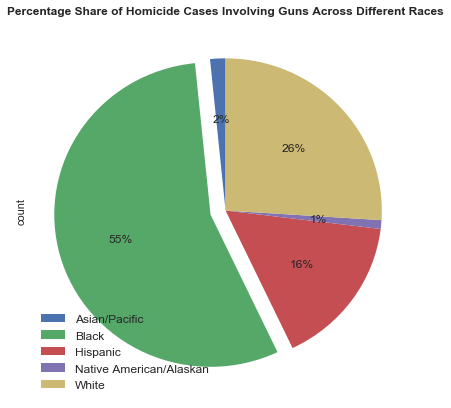

In [91]:
ax_homicide = cause_race.iloc[5:10].plot.pie(figsize = (7,7), startangle = 90, explode = (0,0.1,0,0,0), autopct='%1.0f%%', fontsize = 12, labels= ["","","","",""])
ax_homicide.legend(loc =3, labels= ["Asian/Pacific", "Black", "Hispanic", "Native American/Alaskan", "White"], fontsize =12)
ax_homicide.set_title("Percentage Share of Homicide Cases Involving Guns Across Different Races", fontweight = "bold")

* As we can see from the graph above, the victims of more than 50% of the homicide incidents by guns are black people. 

Now, in recent times there has been numerous incidents of unarmed balck people being shot by the local policemen. So it will be interesting to see the distribution of homicide cases, which involved local police, across different races.

** The value '1' in police column implies that local police were invloved and '0' implies the otherwise

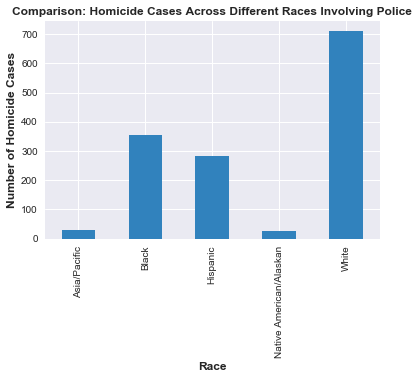

In [14]:
police_race = guns.groupby(["police","race", "intent"]).count()["count"]
ax_police_race = police_race.iloc[20:25].plot(kind = "bar", colormap = "tab20c")
ax_police_race.set_title("Comparison: Homicide Cases Across Different Races Involving Police", fontweight = "bold")
ax_police_race.set_ylabel("Number of Homicide Cases", fontsize= 12, fontweight = "bold")
ax_police_race.set_xlabel("Race", fontsize= 12, fontweight = "bold")
ax_police_race.set_xticklabels(["Asia/Pacific", "Black", "Hispanic", "Native American/Alaskan", "White"], fontsize= 10)
ax_police_race

In order to ge a clear picture it is essential that we normalize the values by dividing the number of people died of homicide, invloving guns, for each race by the total population of that race living in USA. For this we will be using our "census" dataframe. 

- Asian/Pacific Islander: Race Alone - Asian plus Race Alone - Native Hawaiian and Other Pacific Islander.
- Black: Race Alone - Black or African American.
- Hispanic: Race Alone - Hispanic
- Native American/Native Alaskan: Race Alone - American Indian and Alaska Native
- White: Race Alone - White

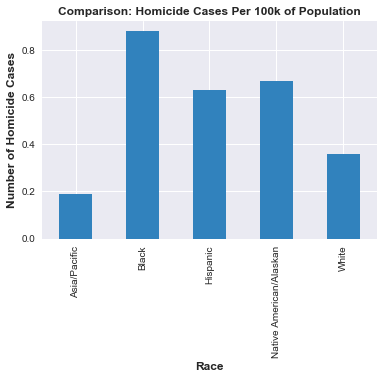

In [96]:
police_race_per_100k =  police_race.iloc[20:25].to_frame()
total_population = []
census["Asian/Pacific"] = census["Race Alone - Asian"] + census["Race Alone - Native Hawaiian and Other Pacific Islander"]
# For the "Asian/Pacific we will be adding the asian and pacific islanders population
for i in range(5):
    total_population.append(census.iloc[:,[17, 12, 11, 13, 10]].values.tolist()[0][i])
police_race_per_100k["total_population"] = total_population
police_race_per_100k["per_100k"] = round((police_race_per_100k["count"]/police_race_per_100k["total_population"])*100000,2)
ax_police_race_100k = police_race_per_100k["per_100k"].plot(kind = "bar", colormap = "tab20c")
ax_police_race_100k.set_title("Comparison: Homicide Cases Per 100k of Population", fontweight = "bold")
ax_police_race_100k.set_ylabel("Number of Homicide Cases", fontsize= 12, fontweight = "bold")
ax_police_race_100k.set_xlabel("Race", fontsize= 12, fontweight = "bold")
ax_police_race_100k.set_xticklabels(["Asia/Pacific", "Black", "Hispanic", "Native American/Alaskan", "White"], fontsize= 10)
ax_police_race_100k

After normalization and looking at the bar plot above, it becomes very apparent that a black person is most likely to be shot by the local police in comparison to the people from other races. 






Another ineresting thing to look for would be to see if the homicide by guns has any coorelation with the age group:

Text(0.5,0,'Age Group')

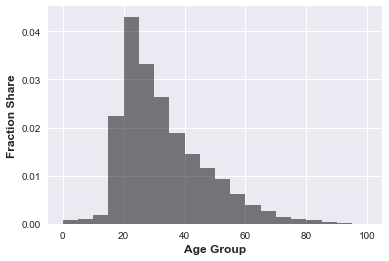

In [45]:
homicide_age = guns[guns["intent"] == "Homicide"]
ax_homicide_age = homicide_age["age"].plot.hist(bins = 20, alpha = 0.5,range = (0,100), density = True, colormap = "gray")
ax_homicide_age.set_ylabel("Fraction Share", fontweight = "bold", fontsize=12)
ax_homicide_age.set_xlabel("Age Group", fontweight = "bold", fontsize=12)

Text(0.5,0,'Age Group')

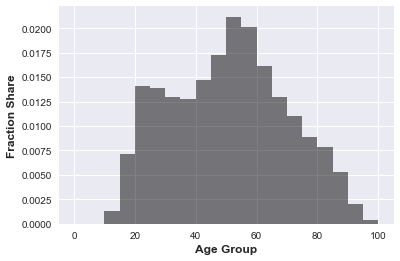

In [46]:
suicide_age = guns[guns["intent"] == "Suicide"]
ax_suicide_age = suicide_age["age"].plot.hist(bins = 20, alpha = 0.5, range=(0,100), colormap = "gray", density = True)
ax_suicide_age.set_ylabel("Fraction Share", fontweight = "bold", fontsize=12)
ax_suicide_age.set_xlabel("Age Group", fontweight = "bold", fontsize=12)

It is apparent from the two histograms above that people between the age group of 20-40 are often the victims of homicides with guns while suicide cases invloving guns are dispersed more uniformly across all age groups. However, it seems more people in their mid 50's have used guns to commit suicide   

Text(0.5,1,'Comparison: Number of Gun Deaths of Men and Women')

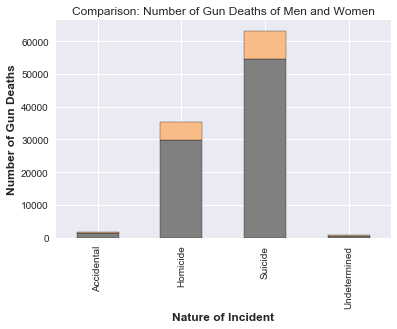

In [62]:
cause_sex_m = guns[guns["sex"] == "M"].groupby(["intent"]).count()["count"]
cause_sex_f = guns[guns["sex"] == "F"].groupby(["intent"]).count()["count"]
ax_cause_sex = cause_sex_m.plot(kind= "bar", color = "gray", edgecolor = "black",stacked = True)
ax_cause_sex = cause_sex_f.plot(kind= "bar", bottom = cause_sex_m, color = "#f9bc86", edgecolor = "black",stacked = True)
ax_cause_sex.set_ylabel("Number of Gun Deaths", fontweight = "bold", fontsize=12)
ax_cause_sex.set_xlabel("Nature of Incident", fontweight = "bold", fontsize=12)
ax_cause_sex.set_title("Comparison: Number of Gun Deaths of Men and Women")

A stacked bar graph comparing the number of various deaths incidents among men and women invloving guns. Clearly, men are most likely to be the victims of gun deaths in comparison to women. 

## Learning Summary:

* Concepts Learned: Data Analysis through data visualization, converting dataframe into a list (df.values().tolist()), 
* Fucntions and Methods: seaborn, matplotlib, pandas, .groupby(), .plot,.to_frame, bar plot, pie plot, histogram 